In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
df_input = pd.read_csv(Path('/Users/jaredschwartz/Downloads/Education_Data_Cleaned.csv'))
df_output = pd.read_csv(Path('/Users/jaredschwartz/Downloads/Personal Income.csv'))
df_input.dtypes

State                                           object
YEAR                                           float64
        Less_than_9th_ grade                   float64
9th_to_12th_grade_no_diploma                   float64
High_school_graduate_(includes_equivalency)    float64
Some_college,_no_degree                        float64
Associates_degree                              float64
Bachelors_degree                               float64
Graduate_or_professional_degree                float64
Population                                     float64
dtype: object

In [26]:
df_input.dropna(inplace=True)

In [33]:
df_x = (df_input["9th_to_12th_grade_no_diploma"]/df_input.Population)
df_y = df_output.T.stack()
# This is to drop residual column labels that get swept up when stacking
df_y = df_y.iloc[100:600]as
df_x

0      0.116740
1      0.061133
2      0.080479
3      0.107170
4      0.087766
         ...   
495    0.061702
496    0.047713
497    0.086664
498    0.047808
499    0.037523
Length: 500, dtype: float64

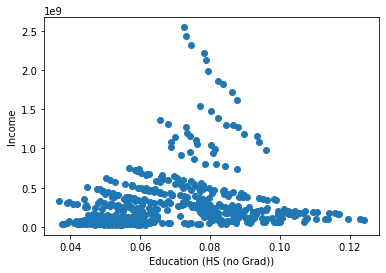

In [35]:
plt.scatter(df_x, df_y)
plt.xlabel('Education (HS (no Grad))')
plt.ylabel('Income')
plt.show()

In [11]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df_x.values.reshape(-1, 1)

In [12]:
X[:5]

array([[0.13904179],
       [0.18415465],
       [0.16676975],
       [0.13161434],
       [0.19132889]])

In [13]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(500, 1)

In [14]:
y = df_y

In [15]:
# Create a model with scikit-learn
model = LinearRegression()

In [16]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [17]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(500,)


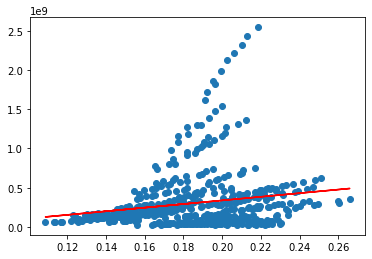

In [18]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [19]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[2.30181759e+09]
-121916465.67931032
